## CS/ECE/ISyE 524 - Fall 2023 - HW 10 - Starter Code

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:      256
Number of nonzeros in Lagrangian Hessian.............:      222

Total number of variables............................:       12
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:       34
        inequality constraints with only lower bounds:        4
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       30

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.9964082e-01 4.22e-01 1.48e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

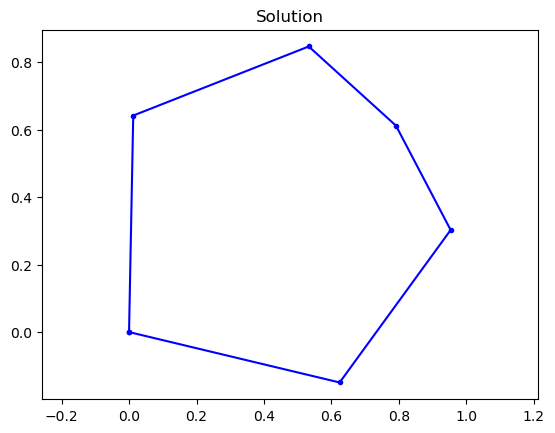

In [4]:
# Question 1 starter
# *******Optimal value is still for a degenerate hexagon!!!*********
using Random, JuMP, Ipopt

m = Model(Ipopt.Optimizer)
n = 6
# locations of the six vertices.
@variable(m, x[1:n])
@variable(m, y[1:n])

@constraint(m, x[1] == 0)
@constraint(m, y[1] == 0)

# For containing the Hexagon diameter to be <= 1
for i = 1:n
    for j = 1:n
        if i != j
            @constraint(m, (x[i]-x[j])^2 + (y[i]-y[j])^2 <= 1)
        end
    end
end

# For keeping area >= 0 for 4 triangles to be used in the objective
tri_first = [2 3 4 5] 
# Will allow 123, 134, 145, and 156 to be iterated through
# Since 1 is at 0,0 the area of the triangle will be e.g. 0.5*|x2y3 - y2x3|
for i = tri_first
    @NLconstraint(m, x[i]*y[i+1]-y[i]*x[i+1] >= 0 )
end

@NLobjective(m, Max, 0.5*sum( x[i]*y[i+1]-y[i]*x[i+1] for i=tri_first))

Random.seed!(36546)

set_start_value.(x,rand(n))
set_start_value.(y,rand(n))

optimize!(m)
# print optimal objective
println("area=",objective_value(m))
    
# plot solution from optimal values of (x,y) coordinates.
using PyPlot
X = [value.(x); 0]
#println(X)

Y = [value.(y); 0]
#println(Y)

axis("equal")
plot(X,Y,"b.-") # Hexagon
title("Solution");

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:       24
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       24

Total number of variables............................:        9
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        6
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.5288800e+05 0.00e+00 6.57e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

[523.3055386212442, -156.94784350151681, -0.19966456906074553]


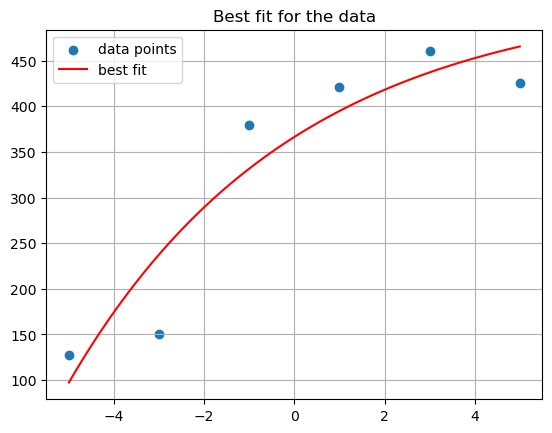

In [5]:
# Question 2 starter
using JuMP, Ipopt

x =     [ -5  -3  -1   1   3   5]
ymeas = [127 151 379 421 460 426]
N = length(x)

# your code here
m = Model(Ipopt.Optimizer)
@variable(m, k[1:3])
@variable(m, y_hat[1:N])
for i = 1:N
    @NLconstraint(m, y_hat[i] == k[1] + k[2]*exp(k[3]*x[i]) )
end
@objective(m, Min, sum( (ymeas[i] - y_hat[i]).^2 for i=1:N ) ) 
optimize!(m)

# Plot the data and the best-fit curve
using PyPlot
kvals = value.(k)
println(kvals)
xv = range(-5, stop=5, length=100)
yv = kvals[1] .+ kvals[2] .* exp.(kvals[3].*xv)

scatter(x, ymeas, label="data points")
plot(xv, yv, "r-", label="best fit")
grid()
legend(loc="best"); title("Best fit for the data")

;